# ISLR- Python: Ch3 -- Applied Question 10

- [Load Carseats Data](#Load-Data)
- [Construct Linear Estimate](#Construct-Linear-Estimate)
- [Describe Predictor/Response Relationship](#Describe-Predictor/Response-Relationship)
- [Fit a Reduced Variable Model](#Fit-a-Reduced-Variable-Model)
- [Perform Estimate Diagnostics](#Perform-Estimate-Diagnostics)

In [3]:
# perform standard imports
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

## Load Data

In [4]:
# load the carseats data from the data dir to a dataframe
df = pd.read_csv('../../../data/Carseats.csv', index_col=0)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Construct Linear Estimate

In [8]:
# We will regress Price, Urban and US (note Urban and US are 2-level categorical) 
# Since we are using categoricals it is easier to switch to the formula version 
# if you want to still use the design matrix approach you need to create a dummy matrix
# see http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html
model = smf.ols('Sales ~ Price + Urban + US',data=df)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           2.39e-23
Time:                        14:51:32   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

## Describe Predictor/Response Relationship
The Urban and US predictors are categorical variables. The slope of the Urban variable represents the added sales for carseats in urban locations (Urban =1) vs non-urban locations (Urban=0). The slope is negative indicating a decrease in carseat sales in Urban areas. **However, the p-value is large for this slope, so it is not significant and we can not reject ${\bf{\beta_{Urban}=0}}$. We will drop this predictor from the model.** The US predictor slope represents the increased sales at US locations (US=1) vs. non-US locations (US=0). The postive slope indicates increased sales in the US market. **The p-value for the US predictor's slope is significant.** Lastly, the Price a quantitative predictor has a negative slope coeffecient indicating reduced sales for more expensive car seats. **The p-value for the Price coeffecient is significant.** The model can be represented by the following equation: 

${Sales = \beta_0 + \beta_{urban}*urban + \beta_{US}*US + \beta_{Price}*Price}$ where ${Urban \in \{0,1\} \> and \> US \in \{0,1\}}$.

## Fit a Reduced Variable Model

In [9]:
reduced_model = smf.ols('Sales ~ Price + US',data=df)
reduced_estimate = reduced_model.fit()
print(reduced_estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 26 Jun 2016   Prob (F-statistic):           2.66e-24
Time:                        15:26:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## Perform Estimate Diagnostics
Neither of the models are particularly well fit to the data. In the model including the Urban predictor, the ${R^2}$ term is 0.239. In the reduced model, the ${R^2}$ term was the same. However because we have fewer predictors the RSE of the second model is less. The confidnce interval for the ${\beta_{US}}$ term is large indicating a poor fit to the data. Both models are failing to capture variance in the data (i.e. high RSS and RSE). See Diagnostic Plots below...

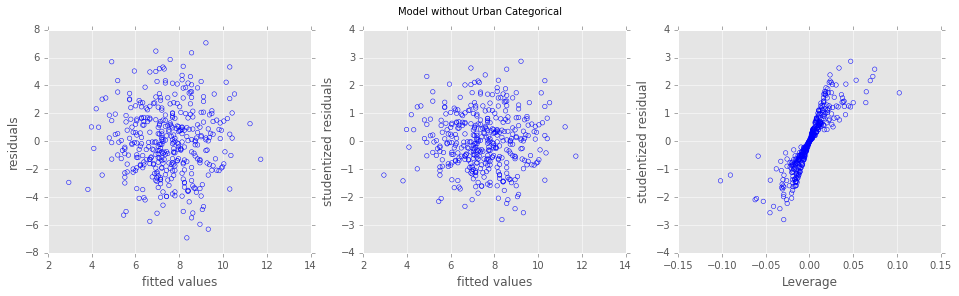

In [13]:
# Obtain the residuals, studentized residuals and the leverages for the reduced model
fitted_values = reduced_estimate.fittedvalues
residuals = reduced_estimate.resid.values
studentized_residuals = OLSInfluence(reduced_estimate).resid_studentized_internal
leverages = OLSInfluence(reduced_estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');
plt.suptitle('Model without Urban Categorical');